## Customer segmentation
#### An automobile company is planning to expand into new markets and needs to develop a targeted customer segmentation strategy to effectively position its products and marketing campaigns. The company has collected customer data with the following attributes:
ID: Unique customer identifier

Gender: Gender of the customer

Ever_Married: Marital status of the customer

Age: Age of the customer

Graduated: Whether the customer has a degree

Profession: Occupation of the customer

Work_Experience: Years of professional experience

Spending_Score: Spending behavior (e.g., Low, Average, High)

Family_Size: Number of family members

Var_1: An anonymized customer category (e.g., lif)estyle or behavior

### The company aims to:

Identify High-Potential Customer Segments – Group customers based on demographics, profession, spending habits, and anonymized behavioral traits (Var_1) to determine which segments are most likely to purchase vehicles.

Optimize Marketing & Sales Strategies – Customize promotions, vehicle recommendations, and financing plans for each segment.

Improve Market Entry Decisions – Prioritize regions or customer groups where demand aligns with the company’s product portfolio (e.g., budget cars for cost-conscious buyers, premium models for high spenders).al classification)


In [159]:
# importing required packages 
import pandas as pd 
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [160]:
#loading data
data=pd.read_csv("Customer_segmentation_Train.csv")

## Data preprocessing

In [161]:
#first five rows of dataset
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [162]:
# Total records and features in dataset 
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 8068
Total features in dataset: 10


In [163]:
# dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


In [164]:
# checking for null value in data 
print("Total null values in dataset:",data.isnull().sum().sum())

Total null values in dataset: 1582


In [165]:
# null values features
data.isnull().sum()[data.isnull().sum() > 0]

Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64

In [166]:
# repalcing null values of categorical data with mode 
for col in data[["Ever_Married","Graduated","Profession","Var_1"]]: 
    mode=data[col].mode()[0]
    data[col].fillna(mode,inplace=True)

In [167]:
# replacing null values of numeric data with mean 
for col in data[["Work_Experience","Family_Size"]]: 
    mean=data[col].mean()
    data[col].fillna(mean,inplace=True)
    data[col]=data[col].astype(int)

In [168]:
# checking null values count after filling 
print("Total null values in dataset:",data.isnull().sum().sum())

Total null values in dataset: 0


In [169]:
# checking for duplicated data
print("Total duplicated values in dataset:",data.duplicated().sum())

Total duplicated values in dataset: 0


In [170]:
# encoding categorical data into numeric 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data[data.select_dtypes(include=["object"]).columns]=data[data.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [171]:
# first five rows after encoding 
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1,2,4,3
1,462643,0,1,38,1,2,2,0,3,3
2,466315,0,1,67,1,2,1,2,1,5
3,461735,1,1,67,1,7,0,1,2,5
4,462669,0,1,40,1,3,2,1,6,5


In [172]:
# dropping ID feature
data_x=data.drop(["ID"],axis=1)

In [173]:
# dataset info after data preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               8068 non-null   int64
 1   Gender           8068 non-null   int32
 2   Ever_Married     8068 non-null   int32
 3   Age              8068 non-null   int64
 4   Graduated        8068 non-null   int32
 5   Profession       8068 non-null   int32
 6   Work_Experience  8068 non-null   int32
 7   Spending_Score   8068 non-null   int32
 8   Family_Size      8068 non-null   int32
 9   Var_1            8068 non-null   int32
dtypes: int32(8), int64(2)
memory usage: 378.3 KB


## Feature scaling and dimessionality reduction 

In [174]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale_data=scale.fit_transform(data)

In [175]:
# reducing dimession in 2d using pca
from sklearn.decomposition import PCA

In [176]:
x_pca=PCA(n_components=2)
pca_data=pd.DataFrame(x_pca.fit_transform(data_x))
# rename columns
pca_data.rename({0:"pca_1",1:"pca_2"},axis=1,inplace=True)

## Model training and evaluation

In [177]:
# importing kmeans clustering from sklearn
from sklearn.cluster import KMeans 

In [178]:
# checking for how many cluster will be there by using elbow method
wcss=[] 
for k in range(1,12): 
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(pca_data) 
    wcss.append(kmeans.inertia_)

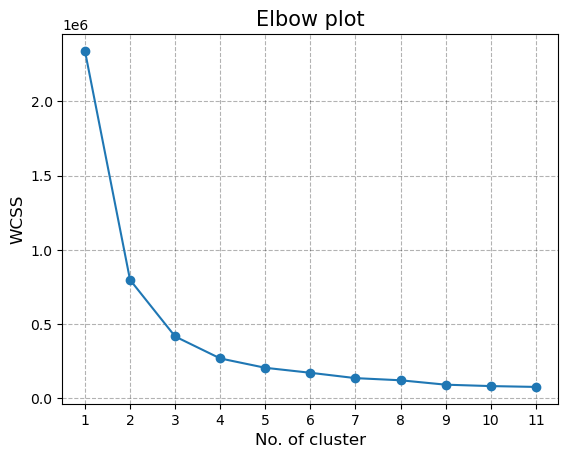

In [179]:
# plotting elbow plot
plt.plot(range(1,12),wcss,marker="o")
plt.xticks(range(1,12))
plt.xlabel("No. of cluster",fontsize=12)
plt.ylabel("WCSS",fontsize=12)
plt.grid(color="black",linestyle="dashed",alpha=0.3)
plt.title("Elbow plot",fontsize=15)
plt.show()

In [180]:
# Evaluate by using kneelocator and silhouette_score
from kneed import KneeLocator 

In [181]:
kl=KneeLocator(range(1,12),wcss,curve="convex",direction="decreasing")
kl.elbow

3

In [182]:
from sklearn.metrics import silhouette_score

In [183]:
silhouette_coffe=[]
for k in range(2,12): 
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(pca_data) 
    score=silhouette_score(pca_data,kmeans.labels_)
    silhouette_coffe.append(score)

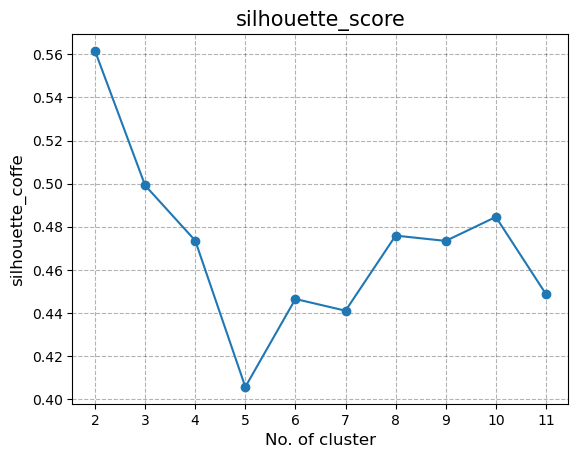

In [184]:
# plotting silhouette_score
plt.plot(range(2,12),silhouette_coffe,marker="o")
plt.xticks(range(2,12))
plt.xlabel("No. of cluster",fontsize=12)
plt.ylabel("silhouette_coffe",fontsize=12)
plt.grid(color="black",linestyle="dashed",alpha=0.3)
plt.title("silhouette_score",fontsize=15)
plt.show()

In [185]:
# training data with 3 clusters 
kmeans=KMeans(n_clusters=3,init='k-means++')

In [186]:
kmeans.fit(pca_data)

KMeans(n_clusters=3)

### Summary of Customer Segmentation Approach
#### Methodology & Findings:
1) Elbow Method → Suggested 3 clusters as the optimal number (where the within-cluster sum of squares (WCSS) starts to plateau).

2) K-Means Clustering (k=3) → Confirmed three distinct customer segments with meaningful differences in demographics, spending behavior, and profession.

3) Silhouette Score Analysis → Indicated that 2 clusters had a slightly better score, but the difference was marginal.

#### Decision to Use 3 Clusters:
1) Business Justification: While the silhouette score slightly favored 2 clusters, the elbow method and K-means results provided more interpretable and actionable segments.

2) Customer Segmentation Needs: Three clusters allowed for finer granularity in targeting (e.g., high-income professionals vs. budget-conscious families vs. luxury seekers), whereas 2 clusters would have oversimplified the strategy.

3) Trade-off Accepted: A minor dip in silhouette score was deemed acceptable for more practical marketing applications.

#### Final Segmentation Strategy:
1) Cluster 0: Young, mid-income professionals (moderate spending, early career).

2) Cluster 1: High-spending, experienced professionals (luxury/premium buyers).

3) Cluster 2: Cost-conscious families (budget-friendly vehicles).

### Conclusion: Despite the silhouette score suggesting two clusters, three clusters were chosen for better business alignment and actionable customer targeting in the new market expansion.

In [187]:
# creating dataframe with prediction by kmeans
label=kmeans.predict(pca_data)
labels=pd.DataFrame()
labels["label"]=label
labels["label"]=labels["label"].replace({0:"A",1:"B",2:"C"})

In [188]:
#concat the labels and pca_dataframe
data_label=pd.concat([pca_data,labels],axis=1)
data_label.head()

,pca_1,pca_2,label
0,-21.435587,-2.521172,A
1,-5.437442,-0.763232,C
2,23.610452,-0.581072,B
3,23.668181,-1.863070,B
4,-3.492401,-0.880751,C


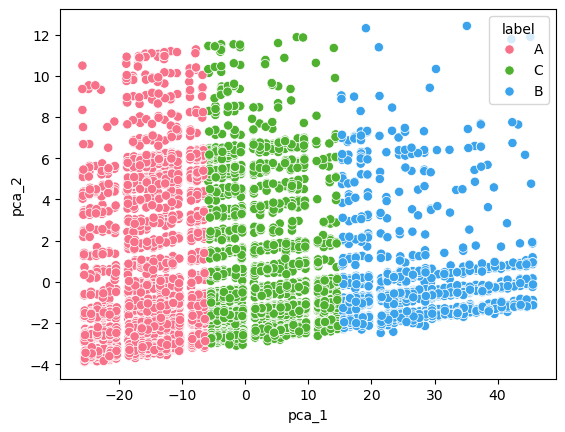

In [189]:
# plotting clusters
sns.scatterplot(data=data_label,x="pca_1",y="pca_2",hue="label",s=45,palette="husl")
plt.show()

In [190]:
# creating dataframe for cust id and the segmentation
segmentation_id=pd.DataFrame()
segmentation_id["ID"]=data["ID"]
segmentation_id["segmentation"]=labels["label"]

In [191]:
segmentation_id.head()

,ID,segmentation
0,462809,A
1,462643,C
2,466315,B
3,461735,B
4,462669,C
